# **Problem Statement**
- A regression problem where we have to predict the price of the laptop based on the features provided -> `'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'`
    
- Dataset link : https://www.kaggle.com/datasets/muhammetvarl/laptop-price

---

## **Import the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as mysql
import warnings
from dotenv import load_dotenv
import os

warnings.filterwarnings('ignore')

load_dotenv()

True

### Connect to database and load the data as dataframe

In [3]:
# connect to the database
db = mysql.connect(
    host = os.getenv('host'),
    user = os.getenv('user'),
    port = os.getenv('port'),
    passwd = os.getenv('password'),
    database = os.getenv('database')
)

In [4]:
# read the data from the database into a pandas dataframe
df = pd.read_sql("SELECT * FROM laptop", con=db)

In [5]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
df.shape

(1303, 13)

### The dataset has 1303 rows and 13 features

### **Dataset Information**

- **laptop_ID**: Index (not needed)
- **company**: Laptop manufacturer
- **product**: Laptop model
- **type_name**: Product type
- **inches**: Screen size (in inches)
- **screen_resolution**: Display resolution
- **cpu**: Processor model
- **ram**: RAM size (in GB)
- **memory**: Storage size (e.g., 256GB SSD)
- **gpu**: Graphics card model
- **op_sys**: Operating system
- **weight**: Weight (in kg)
- **price_euros**: Price (in euros)

---

## **Things to check**
- Check for missing values
- Check for duplicates
- check data types
- Check for statistics
- check for unique values in each column
- check for the distribution of the target variable

---

### 1. Missing values

In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### No null values in the dataset

### 2. Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

### No duplicate values in the dataset

### 3. Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### The dataset contains 3 numeric and 10 categorical features

### 4. Outliers

In [10]:
# check for outliers using quantile
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


### **Insights**:
- **Inches**
    - The size of the laptop ranges from 10 inches to 18 inches (approx.)
    - The average screen size is approximately 15 inches
    - The standard deviation is 1, indicating that most laptop have sceen sizes colse to the mean

- **Price**
    - The price for the laptop ranges from 174 to 6099 euro
    - The average price of a laptop is approx. 1123 euro
    - The standard deviation is 699 euros, indicating a high level of variability in laptop prices. This means that laptop prices are spread out over a wide range, with many prices significantly higher or lower than the mean

### 5. Unique values

In [11]:
df.nunique().sort_values(ascending=False)

laptop_ID           1303
Price_euros          791
Product              618
Weight               179
Cpu                  118
Gpu                  110
ScreenResolution      40
Memory                39
Company               19
Inches                18
Ram                    9
OpSys                  9
TypeName               6
dtype: int64

### 6. Target variable

In [12]:
df.Price_euros.value_counts().sort_values(ascending=False).head(10)

Price_euros
1499.0    14
1099.0    14
1799.0    14
899.0     11
499.0     11
1299.0    11
1199.0    11
999.0     10
1349.0     9
1399.0     9
Name: count, dtype: int64

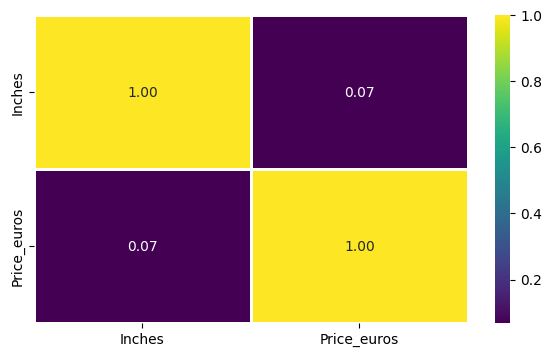

In [13]:
# check multicollinearity using correlation matrix between the numerical features
plt.figure(figsize=(7,4))
new_df = df.copy()
new_df.drop('laptop_ID', axis=1, inplace=True)
sns.heatmap(new_df.corr(numeric_only= True), annot=True, cmap='viridis', fmt='.2f', linewidths=2)
plt.show()

---

## **Data Visualization**

### 1. Distribution of numerical features

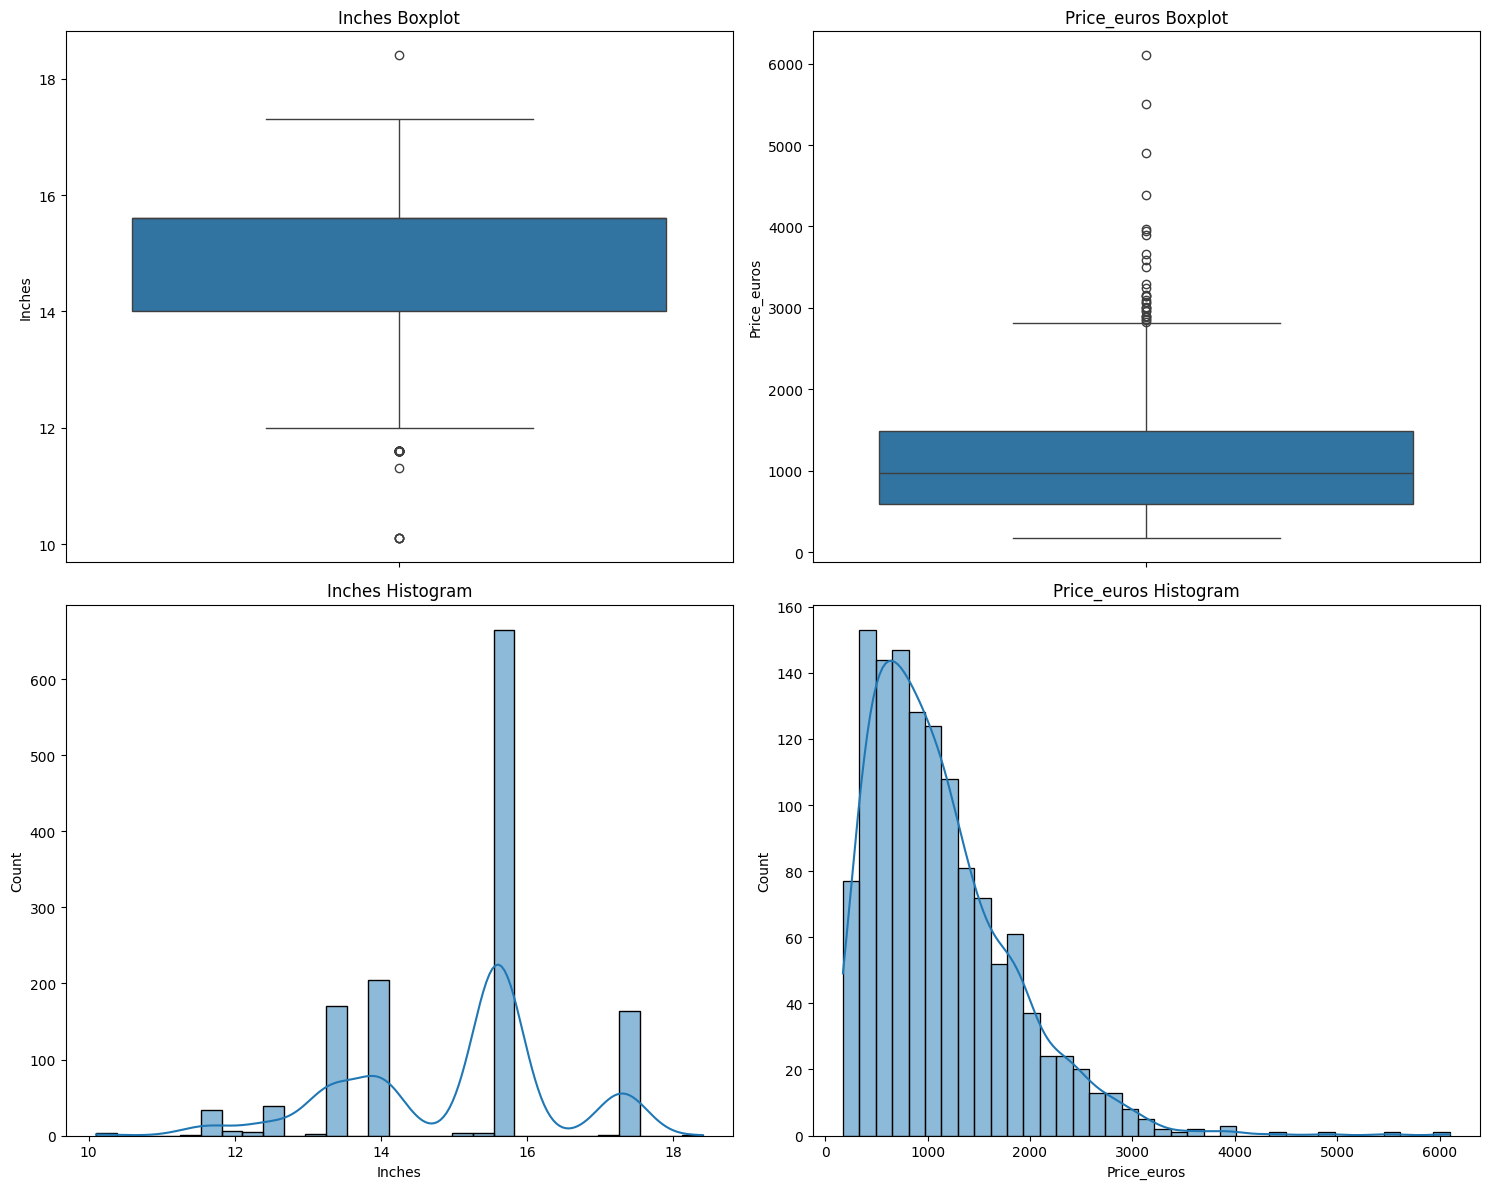

In [14]:
numerical_features = df.select_dtypes(include=[np.number]).columns
numerical_features = [feature for feature in numerical_features if feature != 'laptop_ID']

fig, axes = plt.subplots(2, len(numerical_features), figsize=(15, 12))

for i, feature in enumerate(numerical_features):
    sns.boxplot(df[feature], ax=axes[0, i])
    axes[0, i].set_title(f'{feature} Boxplot')
    
    sns.histplot(df[feature], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'{feature} Histogram')

plt.tight_layout()
plt.show()

### **Insights**

- **Inches**
    - **Distribution**: No clear distribution pattern observed.
    - **Outliers**: Very few outliers present.
    - **Range**: Screen sizes mostly range from 14 to 16 inches (Q1-Q3).

- **Price**
    - **Distribution**: Data is right-skewed.
    - **Outliers**: A significant number of outliers present.
    - **Range**: Prices mostly range from 600 to 1500 euros (Q1-Q3).

In [20]:
category_features = df.select_dtypes(include=[object]).columns
category_features

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

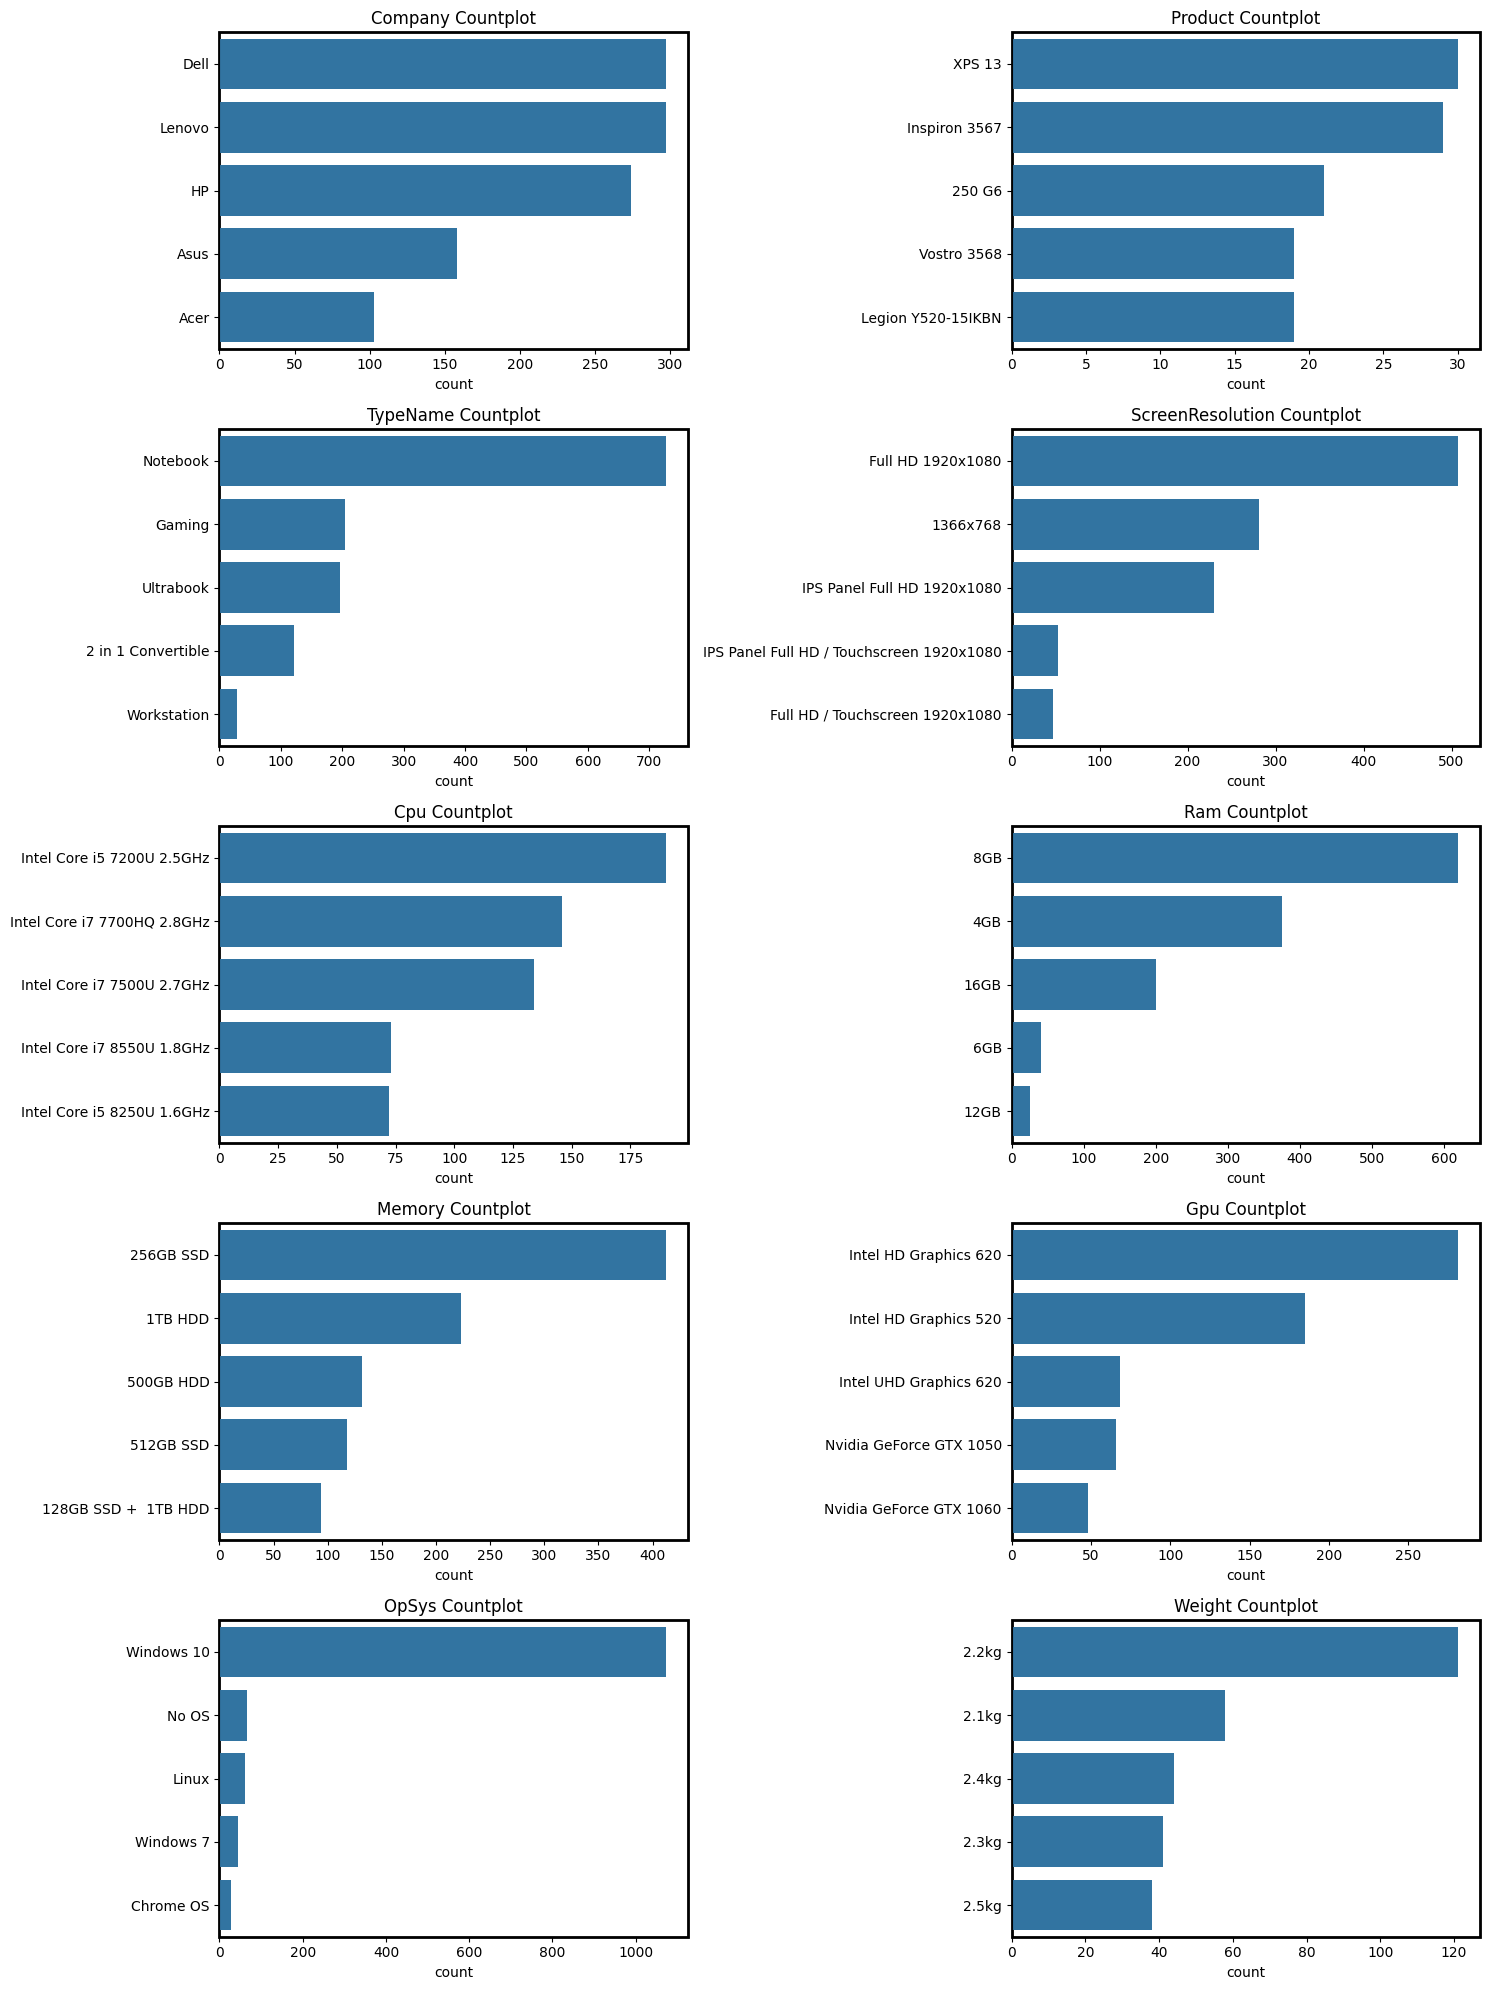

In [27]:
fig, axes = plt.subplots(len(category_features) // 2 + len(category_features) % 2, 2, figsize=(15, 20))

for i, feature in enumerate(category_features):
    row, col = divmod(i, 2)
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().sort_values(ascending=False).index[:5], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Countplot')
    axes[row, col].set_ylabel('')
    axes[row, col].patch.set_edgecolor('black')  
    axes[row, col].patch.set_linewidth(2)  

# Remove any empty subplots
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.subplots_adjust(hspace=0.8, wspace=0.4)
plt.tight_layout()
plt.show()
    

### **Insights**

- **Company**: 
    - Dell laptops are the most preferred, followed by Lenovo and HP.
- **Products**: 
    - The most sold product is the XPS 13, followed by the Inspiron 3567 and the 250 G6.
- **TypeName**: 
    - Notebooks are the most popular type, followed by Gaming and Ultrabook.
- **ScreenResolution**: 
    - Laptops with Full HD 1920x1080 screen resolutions are the most sold, followed by 1366x768 and IPS Panel Full HD 1920x1080.
- **CPU**: 
    - The Intel Core i5 7200u 2.5 GHz is the most sold CPU type.
- **Ram**: 
    - Laptops with 8GB RAM are the most sold, followed by 4GB and 16GB.
- **Memory**: 
    - 256GB SSD is the most sold, followed by 1TB HDD and 500GB HDD.
- **GPU**: 
    - Intel HD Graphics 620 is the most sold, followed by Intel HD Graphics 520 and Intel UHD Graphics 620.
- **OpSys**: 
    - Most people have bought laptops with Windows 10, followed by No OS and Linux.
- **Weight**: 
    - Most people buy laptops weighing 2.2kg, followed by 2.1kg and 2.4kg.

In [28]:
# convert the categorical features to numerical using ordinal encoding and scale the numerical features
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# drop the laptop_ID column
new = df.drop(['laptop_ID', 'Price_euros'], axis=1)

# encode the categorical features
encoder = OrdinalEncoder()

new[category_features] = encoder.fit_transform(new[category_features])

# scale the numerical features
scaler = StandardScaler()

new = scaler.fit_transform(new)

new = pd.DataFrame(new, columns=df.columns[1:-1])

In [30]:
new = pd.concat([new, df['Price_euros']], axis=1)

In [31]:
new.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.475914,0.865168,-1.542166,0.153493,3.083616,-1.219843,1339.69
1,-1.333189,-0.041946,1.138779,-1.204407,-1.043399,-0.555339,0.865168,-1.792003,-0.170358,3.083616,-1.289595,898.94
2,0.136477,-1.502761,0.335406,0.408772,-0.155303,-0.118498,0.865168,-0.043142,-0.077829,-0.781657,-0.382823,575.00
3,-1.333189,-0.047766,1.138779,0.268495,2.001504,0.318342,-1.797179,1.580802,-2.113462,3.083616,-0.452574,2537.45
4,-1.333189,-0.047766,1.138779,-1.204407,1.747762,-0.396488,0.865168,-0.043142,0.199757,3.083616,-1.219843,1803.60


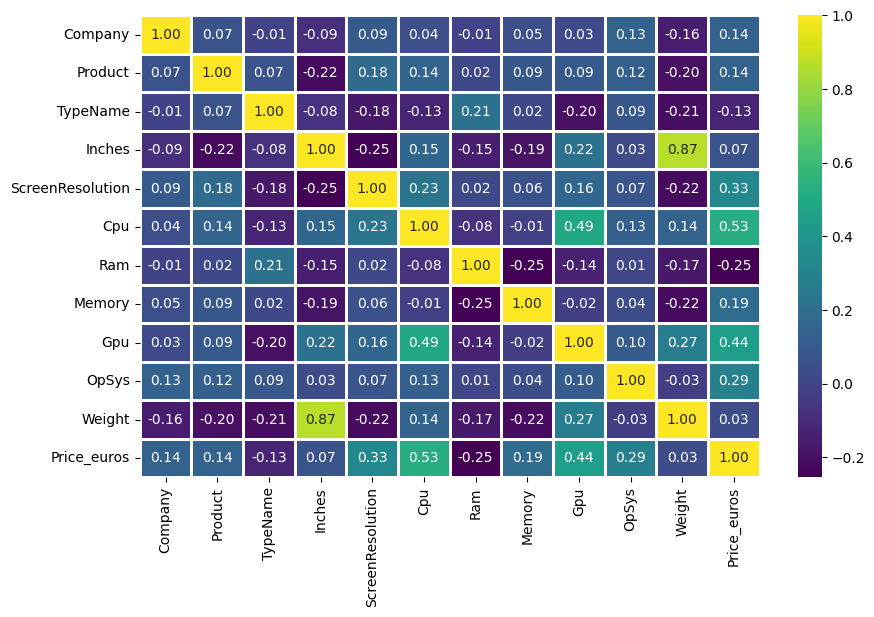

In [32]:
# lets check the correlation between the features and the target variable
plt.figure(figsize=(10, 6))
sns.heatmap(new.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=2)
plt.show()


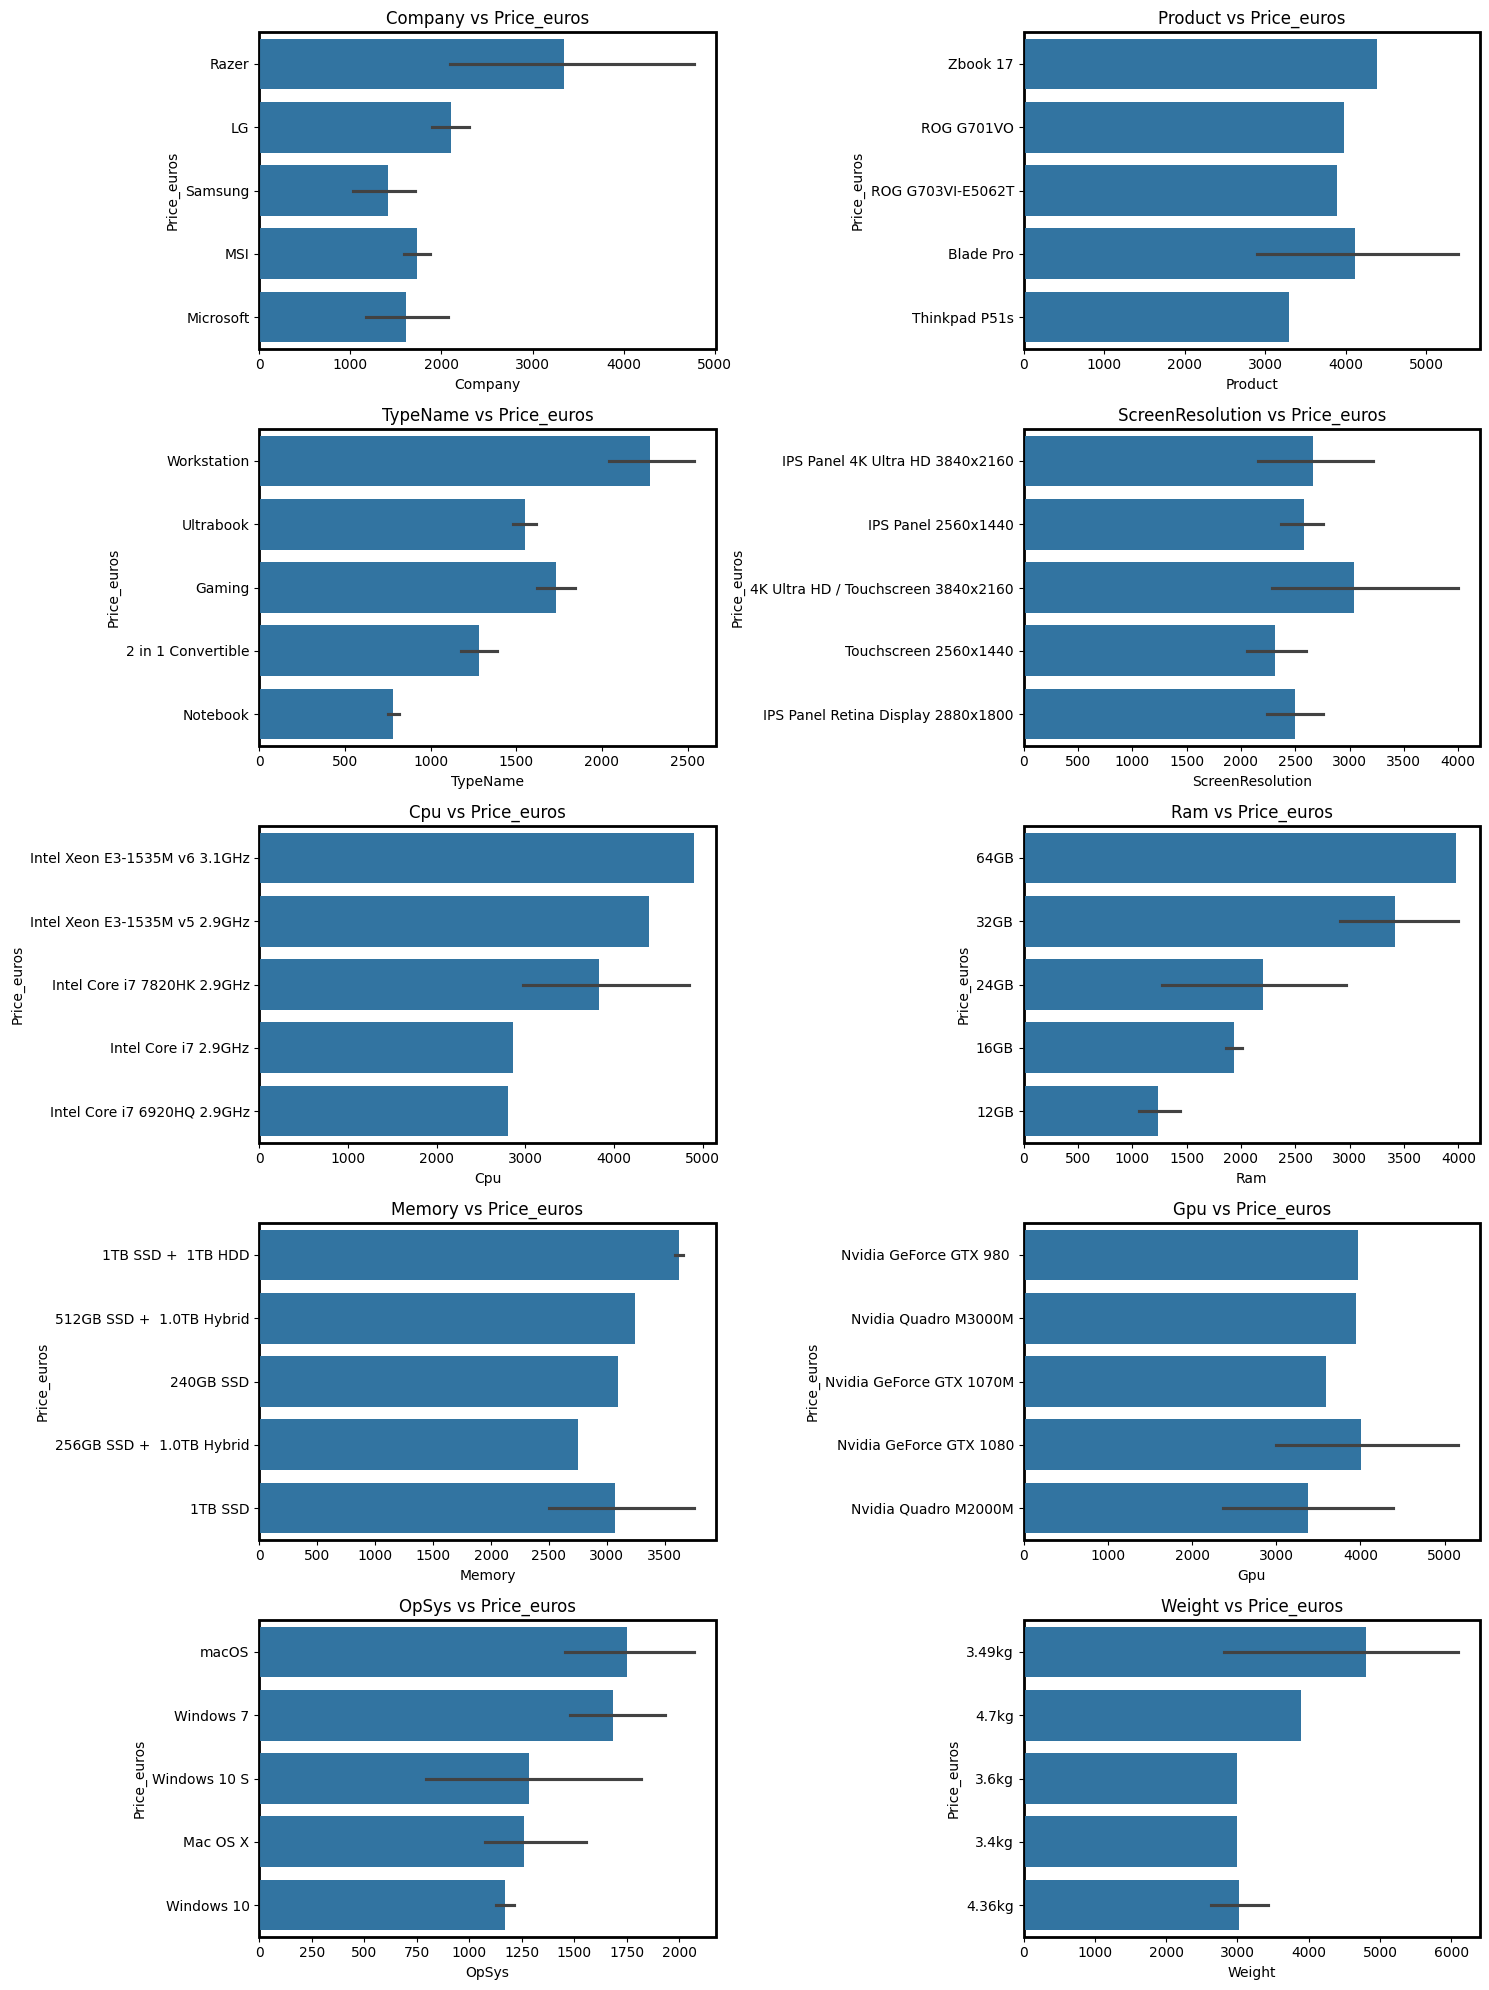

In [46]:
# lets see the relationship between the categorical features and the target variable
fig, axes = plt.subplots(len(category_features) // 2 + len(category_features) % 2, 2, figsize=(15, 20))

for i, feature in enumerate(category_features):
    # plot the top 5 categories that have the highest average price
    sns.barplot(y=feature, x='Price_euros', data=df, order=df.groupby(feature)['Price_euros'].median().sort_values(ascending=False).index[:5], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{feature} vs Price_euros')
    axes[i // 2, i % 2].set_ylabel('Price_euros')
    axes[i // 2, i % 2].set_xlabel(feature)
    axes[i // 2, i % 2].patch.set_edgecolor('black')
    axes[i // 2, i % 2].patch.set_linewidth(2)

# Remove any empty subplots
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.subplots_adjust(hspace=3, wspace=0.4)
plt.tight_layout()  
plt.show()